# Fourier series of simples functions

In [1]:
import numpy as np
from scipy.signal import sawtooth, square
import matplotlib.pyplot as plt

In [2]:
def fourier_series_real(x, a0, an, bn):
    '''
    Compute the Fourier series expansion (in the sine-cosine form)
    of a given function.
    
    Parameters
    ----------
    x : 1D array
        Coordinates where the Fourier expansion will be computed.
    a0 : scalar
        Coefficient a0 of the expansion.
    an, bn : 1D arrays or None
        Cosine and sine coefficients of the expansion. If not None, must 
        have n-1 elements, where n is the maximum degree of the expansion.
        If an and bn are not None, they must have the same number of elements.
        
    Returns
    -------
    fourier_series : 1D array
        Fourier expansion computed at the points x up to degree n.
    '''
    assert isinstance(x, np.ndarray), 'x must be an array'
    assert x.ndim == 1, 'x must be an 1D array'
    assert np.isscalar(a0), 'a0 must be a scalar'
    if an is not None:
        assert isinstance(an, np.ndarray), 'an must be an array'
        assert an.ndim == 1, 'an must be a 1D array'
    if bn is not None:
        assert isinstance(bn, np.ndarray), 'bn must be an array'
        assert bn.ndim == 1, 'bn must be a 1D array'
    if (an is not None) and (bn is not None):
        assert an.size == bn.size, 'an and bn must have the same number of elements'

    fourier_series = np.zeros_like(x) + a0/2

    if an is not None:
        for ni, ani in enumerate(an):
            fourier_series += ani*np.cos((ni+1)*x)
    if bn is not None:
        for ni, bni in enumerate(bn):
            fourier_series += bni*np.sin((ni+1)*x)

    return fourier_series

In [3]:
def fourier_series_complex(x, c0, cn):
    '''
    Compute the Fourier series expansion (in the complex exponential 
    form) of a given function.
    
    Parameters
    ----------
    x : 1D array
        Coordinates where the Fourier expansion will be computed.
    c0 : scalar
        Coefficient c0 of the expansion.
    cn : 1D array
        Complex exponential coefficients of the expansion related to 
        positive degrees. It must have n elements, where n is the 
        maximum degree of the expansion.
        
    Returns
    -------
    fourier_series : 1D array
        Fourier expansion computed at the points x up to degree n.
    '''
    assert isinstance(x, np.ndarray), 'x must be an array'
    assert x.ndim == 1, 'x must be an 1D array'
    assert np.isscalar(c0), 'c0 must be a scalar'
    if cn is not None:
        assert isinstance(cn, np.ndarray), 'cn must be an array'
        assert cn.ndim == 1, 'cn must be a 1D array'

    fourier_series = np.zeros(x.size, dtype='complex128') + c0
    
    cn_conj = np.conj(cn)

    for ni, (cni, cni_conj) in enumerate(zip(cn, cn_conj)):
        fourier_series += cni*np.exp(1j*(ni+1)*x)
        fourier_series += cni_conj*np.exp(-1j*(ni+1)*x)

    return fourier_series

In [4]:
def complex_coefficients(a0, an, bn):
    '''
    Compute the coefficients of the complex exponential
    by using the coefficients a0, an and bn as follows:
    
    c0 = a0/2
    
    cn = (an - 1j*bn)/2
    
    Parameters
    ----------
    a0 : scalar
        Coefficient a0 of the expansion.
    an, bn : 1D arrays or None
        Cosine and sine coefficients of the expansion. If not None, must 
        have n-1 elements, where n is the maximum degree of the expansion.
        If an and bn are not None, they must have the same number of elements.
        
    Returns
    -------
    c0 : scalar
        Complex coefficient of degree 0
    cn : 1D array
        Complex exponential coefficients of the expansion.
    '''
    assert np.isscalar(a0), 'a0 must be a scalar'
    if an is not None:
        assert isinstance(an, np.ndarray), 'an must be an array'
        assert an.ndim == 1, 'an must be a 1D array'
        n = an.size
    if bn is not None:
        assert isinstance(bn, np.ndarray), 'bn must be an array'
        assert bn.ndim == 1, 'bn must be a 1D array'
        n = bn.size
    if (an is not None) and (bn is not None):
        assert an.size == bn.size, 'an and bn must have the same number of elements'

    c0 = a0/2

    cn = np.zeros(n, dtype='complex128')
    if an is not None:
        cn.real += an
    if bn is not None:
        cn.imag -= bn
    cn *= 0.5

    return c0, cn

In [5]:
def sawtooth_bn(n):
    '''
    Compute the sine coefficient bn up to degree n 
    of the sawtooth function:
    
    s(x) = x/pi for -pi < x < pi
    s(x + 2pi*k) for k integer
    
    Parameters
    ----------
    n : int
        Degree. 
        
    Returns
    -------
    bn : 1D array
        Sine coefficients up to degree n.
    '''
    assert isinstance(n, int), 'n must be an integer'
    assert n >= 1, 'n must be greater than or equal to 1'
    
    N = np.arange(1, n+1)
    bn = (2*(-1)**(N + 1))/(np.pi*N)

    return bn

In [6]:
def square_bn(n):
    '''
    Compute the sine coefficients bn up to degree n 
    of the square function:
    
    s(x) = 0 for -pi < x < 0
    s(x) = 1 for 0 < x < pi
    s(x + 2pi*k) for k integer
    
    Parameters
    ----------
    n : int
        Degree. 
        
    Returns
    -------
    bn : 1D array
        Sine coefficients up to degree n.
    '''
    assert isinstance(n, int), 'n must be an integer'
    assert n >= 1, 'n must be greater than or equal to 1'

    N = np.arange(1, n+1)
    bn = (1 - (-1)**N)/(np.pi*N)

    return bn

### Sawtooth function

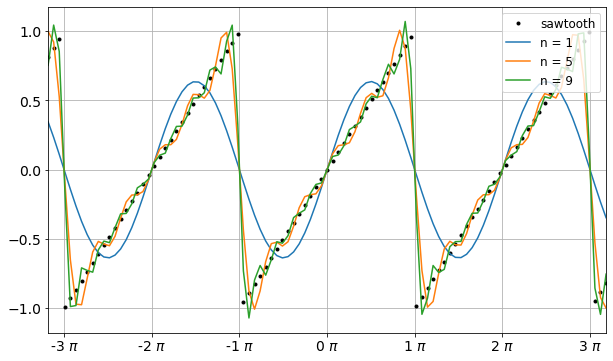

In [7]:
nmax = 11
bn_sawtooth = sawtooth_bn(nmax)
x = np.linspace(-10, 10, 101)

plt.figure(figsize=(10,6))
plt.plot(x, sawtooth(t=x-np.pi, width=1), 'k.', label='sawtooth')
for n in range(1, nmax+1, 4):
    fs = fourier_series_real(x=x, a0=0, an=None, bn=bn_sawtooth[:n])
    plt.plot(x, fs, '-', label='n = %d' % n)
plt.xticks(ticks=[i*np.pi for i in range(-4, 4)], 
           labels=[('%d $\pi$' % i) for i in range(-4, 4)])
plt.xlim(np.min(x), np.max(x))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.show()

In [17]:
nmax = 20
a0_sawtooth = 0
an_sawtooth = np.zeros(nmax)
bn_sawtooth = sawtooth_bn(nmax)
x = np.linspace(-10, 10, 201)
fs_real = fourier_series_real(x=x, a0=a0_sawtooth, 
                              an=an_sawtooth, bn=bn_sawtooth)

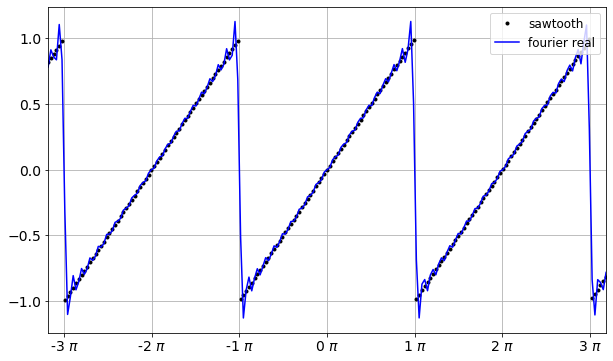

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x, sawtooth(t=x-np.pi, width=1), 'k.', label='sawtooth')

plt.plot(x, fs_real, 'b-', label='fourier real')

plt.xticks(ticks=[i*np.pi for i in range(-4, 4)], 
           labels=[('%d $\pi$' % i) for i in range(-4, 4)])
plt.xlim(np.min(x), np.max(x))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.show()

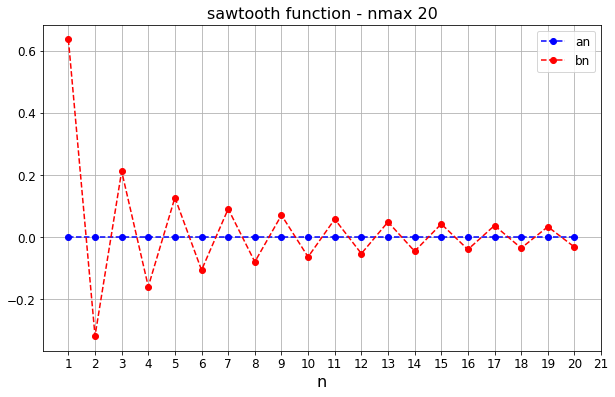

In [23]:
plt.figure(figsize=(10,6))
plt.title('sawtooth function - nmax %d' % nmax, fontsize=16)
plt.plot(an_sawtooth, 'bo--', label='an')
plt.plot(bn_sawtooth, 'ro--', label='bn')
plt.xticks(ticks=[i for i in range(bn_sawtooth.size+1)],
           labels=[i+1 for i in range(bn_sawtooth.size+1)])
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('n', fontsize=16)
plt.show()

In [11]:
c0_sawtooth, cn_sawtooth = complex_coefficients(a0_sawtooth, an_sawtooth, bn_sawtooth)

In [12]:
nmax = cn_sawtooth.size - 1
x = np.linspace(-10, 10, 201)
fs_complex = fourier_series_complex(x=x, c0=c0_sawtooth, cn=cn_sawtooth)

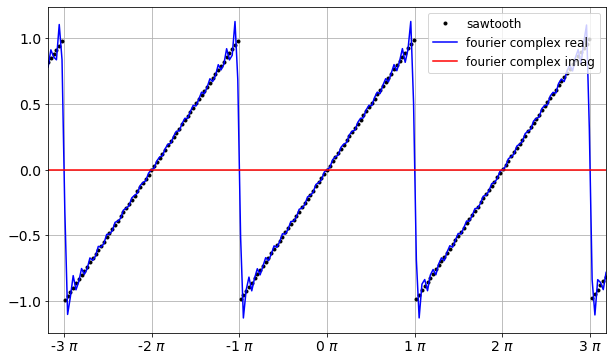

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x, sawtooth(t=x-np.pi, width=1), 'k.', label='sawtooth')

plt.plot(x, fs_complex.real, 'b-', label='fourier complex real')
plt.plot(x, fs_complex.imag, 'r-', label='fourier complex imag')

plt.xticks(ticks=[i*np.pi for i in range(-4, 4)], 
           labels=[('%d $\pi$' % i) for i in range(-4, 4)])
plt.xlim(np.min(x), np.max(x))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.show()

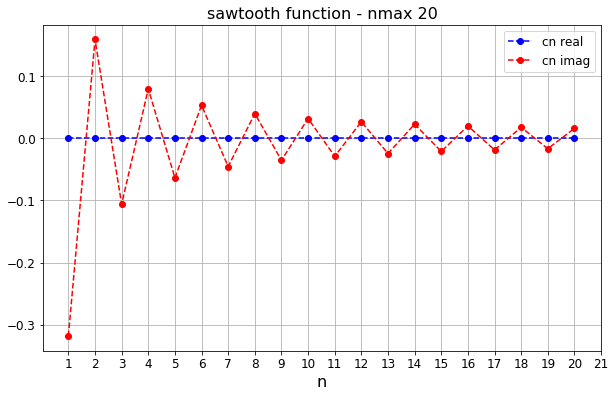

In [25]:
plt.figure(figsize=(10,6))
plt.title('sawtooth function - nmax %d' % nmax, fontsize=16)
plt.plot(cn_sawtooth.real, 'bo--', label='cn real')
plt.plot(cn_sawtooth.imag, 'ro--', label='cn imag')
plt.xticks(ticks=[i for i in range(bn_sawtooth.size+1)],
           labels=[i+1 for i in range(bn_sawtooth.size+1)])
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('n', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

### Square function

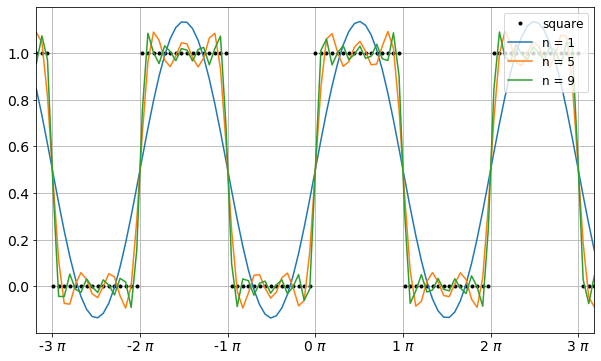

In [26]:
nmax = 11
bn_square = square_bn(nmax)
x = np.linspace(-10, 10, 101)

plt.figure(figsize=(10,6))
plt.plot(x, 0.5*(square(t=x, duty=0.5) + 1), 'k.', label='square')
for n in range(1, nmax+1, 4):
    fs = fourier_series_real(x=x, a0=1, an=None, bn=bn_square[:n])
    plt.plot(x, fs, '-', label='n = %d' % n)
plt.xticks(ticks=[i*np.pi for i in range(-4, 4)], 
           labels=[('%d $\pi$' % i) for i in range(-4, 4)])
plt.xlim(np.min(x), np.max(x))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.show()

In [27]:
nmax = 20
a0_square = 1
an_square = np.zeros(nmax)
bn_square = square_bn(nmax)
x = np.linspace(-10, 10, 201)
fs = fourier_series_real(x=x, a0=a0_square, 
                         an=an_square, bn=bn_square)

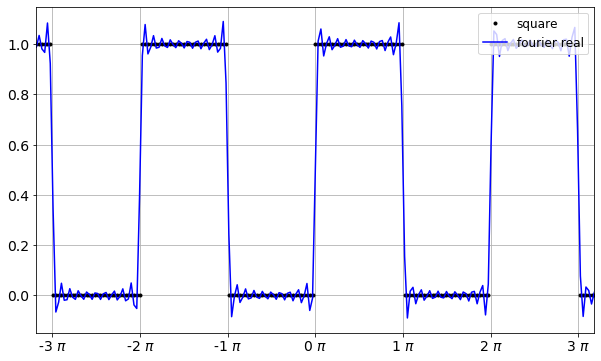

In [30]:
plt.figure(figsize=(10,6))
plt.plot(x, 0.5*(square(t=x, duty=0.5) + 1), 'k.', label='square')

plt.plot(x, fs, 'b-', label='fourier real')

plt.xticks(ticks=[i*np.pi for i in range(-4, 4)], 
           labels=[('%d $\pi$' % i) for i in range(-4, 4)])
plt.xlim(np.min(x), np.max(x))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.show()

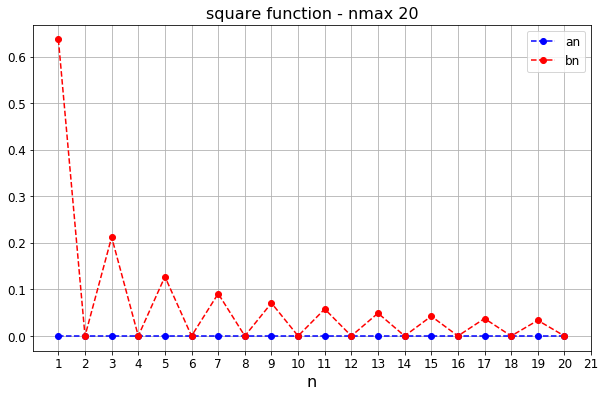

In [31]:
plt.figure(figsize=(10,6))
plt.title('square function - nmax %d' % nmax, fontsize=16)
plt.plot(an_square, 'bo--', label='an')
plt.plot(bn_square, 'ro--', label='bn')
plt.xticks(ticks=[i for i in range(bn_square.size+1)],
           labels=[i+1 for i in range(bn_square.size+1)])
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('n', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

In [32]:
c0_square, cn_square = complex_coefficients(a0_square, an_square, bn_square)

In [36]:
nmax = cn_square.size
x = np.linspace(-10, 10, 201)
fs_complex = fourier_series_complex(x=x, c0=c0_square, cn=cn_square)

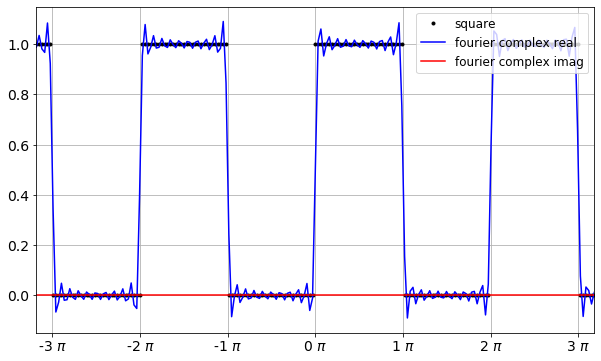

In [37]:
plt.figure(figsize=(10,6))
plt.plot(x, 0.5*(square(t=x, duty=0.5) + 1), 'k.', label='square')

plt.plot(x, fs_complex.real, 'b-', label='fourier complex real')
plt.plot(x, fs_complex.imag, 'r-', label='fourier complex imag')

plt.xticks(ticks=[i*np.pi for i in range(-4, 4)], 
           labels=[('%d $\pi$' % i) for i in range(-4, 4)])
plt.xlim(np.min(x), np.max(x))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.show()

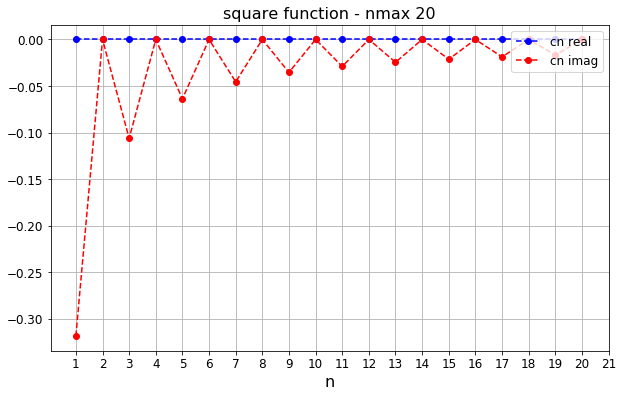

In [38]:
plt.figure(figsize=(10,6))
plt.title('square function - nmax %d' % nmax, fontsize=16)
plt.plot(cn_square.real, 'bo--', label='cn real')
plt.plot(cn_square.imag, 'ro--', label='cn imag')
plt.xticks(ticks=[i for i in range(bn_sawtooth.size+1)],
           labels=[i+1 for i in range(bn_sawtooth.size+1)])
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('n', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()